In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

from keras.datasets import mnist

class mlp_Network(object):

    def __init__(self, num_nuerons_ip, hidden_list, num_nuerons_op):

        self.num_nuerons_ip = num_nuerons_ip
        self.hidden_list = hidden_list
        self.num_nuerons_op = num_nuerons_op

        # A list of all the layers
        layers = [num_nuerons_ip] + hidden_list + [num_nuerons_op]

        # Assign random weights for each layer
        weights = []
        for i in range(len(layers)-1):
            w = np.random.rand(layers[i], layers[i+1])
            weights.append(w)
        self.weights = weights

        #Work on Storing Activations and Derivations
        acts = []
        for i in range (len(layers)):
            activation = np.zeros(layers[i])
            acts.append(activation)
        self.acts = acts

        ders = []
        for i in range (len(layers)-1):
            derivative = np.zeros((layers[i],layers[i+1]))
            ders.append(derivative)
        self.ders = ders
    
    #Forward Propogation Method
    def feed_forward(self, inputs):
        acts = inputs
        self.acts[0] = acts #for the input layer
        for i,w in enumerate(self.weights):
            net_inputs = np.dot(acts, w)
            acts = self.sigmoid(net_inputs)
            self.acts[i+1] = acts
        
        return acts
    
    #BackPropogation
    def back_propogation(self,error):
        
        for i in reversed(range(len(self.ders))):
            acts = self.acts[i+1]
            delta = error * self.sigmoid_der(acts)
            delta_re = delta.reshape(delta.shape[0], -1).T
            curr_acts = self.acts[i]
            curr_acts = curr_acts.reshape(curr_acts.shape[0], -1)

            self.ders[i] = np.dot(curr_acts, delta_re)
            error = np.dot(delta, self.weights[i].T)

        return error

    #Grad Descent
    def grad_descent(self,lr,gamma):
        
        for i in range(len(self.weights)):
            weights = self.weights[i]            
            ders = self.ders[i]
            #Implementing L2 Regularizaition
            weights *= (1-(2*lr*gamma))
            weights += (ders*lr)        

    #Train
    def train(self, x_train, y_train, epochs, lr, gamma):
        error_arr = []
        for i in range(epochs):
            error_train = 0
            for j,x in enumerate(x_train):
                y = y_train[j]

                #Forward Prop
                output = self.feed_forward(x) 
                
                #Error/Delta
                error = (y - output)          
               
                #Back Prop
                self.back_propogation(error)  

                #Gradient Descent
                self.grad_descent(lr,gamma)

                error_train += self.mse(y,output)
            
            error_arr.append(error_train / len(x_train))
            print("Calculated Error: {} at epoch {}".format(error_train / len(x_train), i))
        return error_arr
            
    #Root Mean Squared Error
    def mse(self, y, output):
        return np.sqrt(np.average((y - output)**2))

    #Absolute Error - Not using this method currently - However, was used to compare results with RMSE
    def mse(self, y, output):
        return np.average(np.absolute(y - output))

    #Sigmoid Method
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_der(self,x):
        return x * (1.0 - x)



In [ ]:
import cv2
#Define Network
mlp = mlp_Network(784,[512,256,128,64,32,16,8],6)

# Loading the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Reshaping/Flattening 28x28 into 784 vector
n_pix = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape((x_train.shape[0], n_pix))
x_test = x_test.reshape((x_test.shape[0], n_pix))

y_train = y_train.reshape(60000,1)
y_train = y_train+48 #Because of ASCII 0 = 48

wo_size = 6

y_train =(((y_train[:,None] & (1 << np.arange(wo_size)))) > 0).astype(int)
y_train= y_train.reshape(60000,6)

#Repeating for Test Data
y_test = y_test.reshape(10000,1)
y_test = y_test+48 #For coverting to ASCII
y_test = (((y_test[:,None] & (1 << np.arange(wo_size)))) > 0).astype(int)
y_test= y_test.reshape(10000,6)

#Gaussian Blur
# x_test_blurred = cv2.GaussianBlur(x_test,(5,5),0)

epochs = 10
print("Train Data Error")
train = mlp.train(x_train[:40000],y_train[:40000],epochs,1,0.002)
print("Test Data Error")
test = mlp.train(x_test[:10000],y_test[:10000],epochs,1,0.002)



Train Data Error
Calculated Error: 0.30368201514849197 at epoch 0
Calculated Error: 0.2964797296678746 at epoch 1
Calculated Error: 0.29597903805319953 at epoch 2
Calculated Error: 0.2956922224337085 at epoch 3
Calculated Error: 0.29549928901042105 at epoch 4
Calculated Error: 0.2953683910086448 at epoch 5
Calculated Error: 0.2961816593622889 at epoch 6
Calculated Error: 0.2969449470445561 at epoch 7
Calculated Error: 0.2981643378389758 at epoch 8
Calculated Error: 0.29741980191633727 at epoch 9
Test Data Error
Calculated Error: 0.29096353113684414 at epoch 0
Calculated Error: 0.29201939653888753 at epoch 1
Calculated Error: 0.2919316277359548 at epoch 2
Calculated Error: 0.2918536802709203 at epoch 3
Calculated Error: 0.2917873208398826 at epoch 4
Calculated Error: 0.29174179713244647 at epoch 5
Calculated Error: 0.29180587951254 at epoch 6
Calculated Error: 0.29341789432799914 at epoch 7
Calculated Error: 0.293891867649671 at epoch 8
Calculated Error: 0.29355431018687134 at epoch 9


Output
X0
[1 0 1 0 1 1]
[0.7393497  0.45033503 0.42698154 0.14122823 0.98759432 0.98648976]
X1
[0 0 0 0 1 1]
[0.7393497  0.45033503 0.42698154 0.14122823 0.98759432 0.98648976]
X2
[0 0 1 0 1 1]
[0.7393497  0.45033503 0.42698154 0.14122823 0.98759432 0.98648976]


[0.30368201514849197,
 0.2964797296678746,
 0.29597903805319953,
 0.2956922224337085,
 0.29549928901042105,
 0.2953683910086448,
 0.2961816593622889,
 0.2969449470445561,
 0.2981643378389758,
 0.29741980191633727]

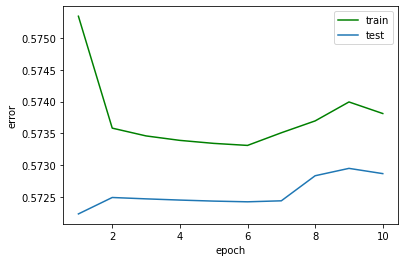

In [ ]:
print("Output")

pixels = x_train[20].reshape((28,28))
output2 = mlp.feed_forward(x_train[20])

pixels = x_train[0].reshape((28,28))
output = mlp.feed_forward(x_train[0])

pixels = x_train[1].reshape((28,28))
output1 = mlp.feed_forward(x_train[1])



print("X0")
print(y_train[0])
print(output)

print("X1")
print(y_train[1])
print(output1)

print("X2")
print(y_train[2])
print(output2)

xaxis = []
for i in range(epochs):
    xaxis.append(i+1)
plt.plot(xaxis,mlp.sigmoid(np.asarray(train)),'g',label="train")
plt.plot(xaxis,mlp.sigmoid(np.asarray(test)),label="test")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
train